In [1]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

Extracting EDF parameters from D:\JHU\NDD\pyautomagic\tests\test_data\scalp_test.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 47199  =      0.000 ...   235.995 secs...


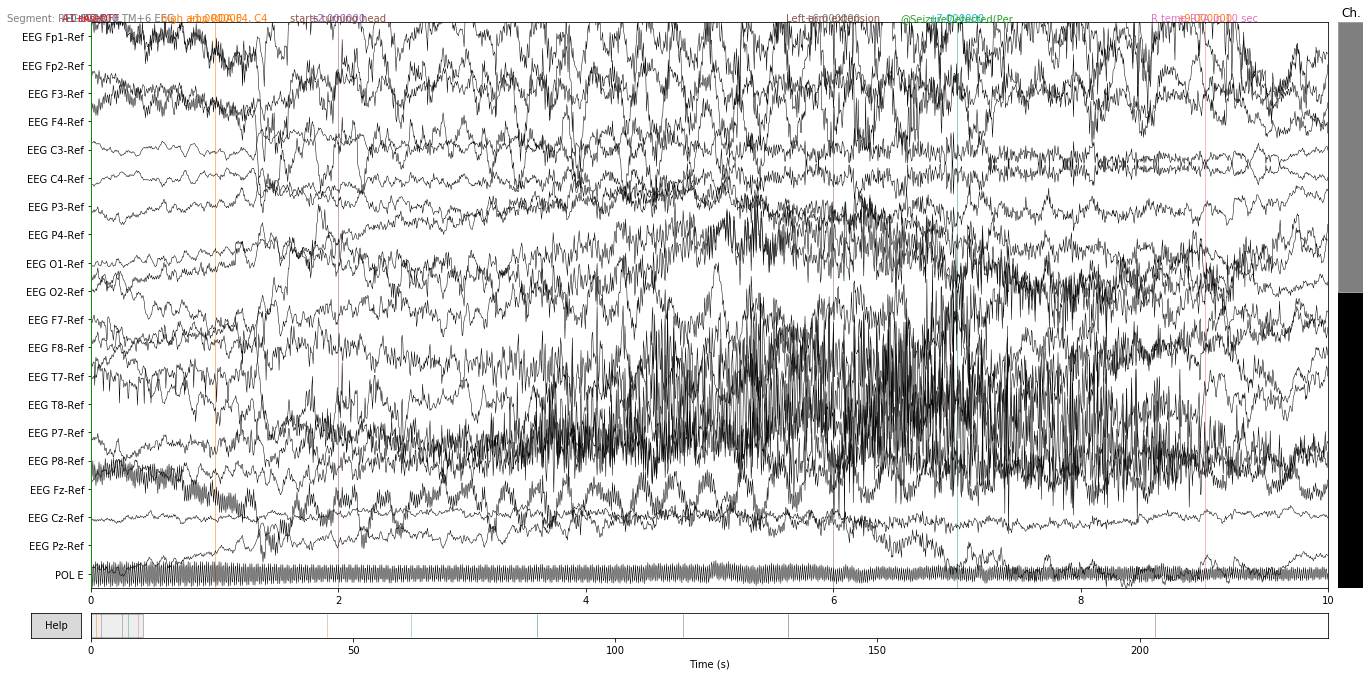

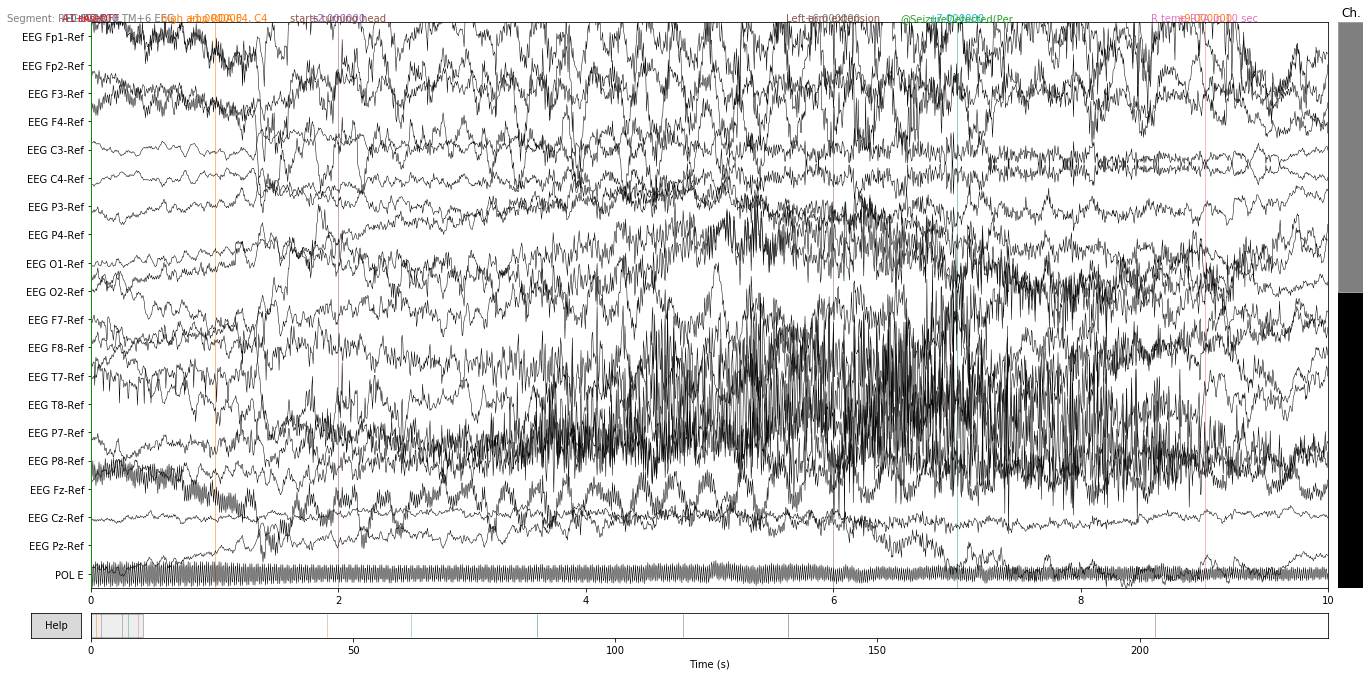

In [4]:
# Load and show raw EEG data
test_dir = os.path.abspath(os.path.dirname(os.getcwd()))
testdata_dir = os.path.join(test_dir,'test_data','scalp_test.edf')
raw = mne.io.read_raw_edf(testdata_dir, preload=True)
raw.plot()

In [6]:
EEG_raw = raw._data  #EEG data in ndarray(...,n_times)
sfreq = raw.info['sfreq']  #sampling frequency
times = raw.times 
EEG_raw

array([[ 9.72656494e-05,  8.44726830e-05,  8.22265896e-05, ...,
         7.60742470e-05,  7.43164348e-05,  7.29492475e-05],
       [ 3.57426344e-05,  1.45512562e-05,  2.04106235e-05, ...,
         3.61377070e-06, -8.69090052e-06, -1.86518248e-05],
       [ 9.66830140e-06,  1.36753617e-06,  7.61752411e-06, ...,
         8.78939684e-06,  5.27377863e-06,  6.25033925e-06],
       ...,
       [-2.19780000e-02, -2.19780000e-02, -2.23443000e-02, ...,
        -2.16117000e-02, -2.19780000e-02, -2.19780000e-02],
       [-5.75146500e+00, -5.75146500e+00, -5.75146500e+00, ...,
        -6.00146500e+00, -6.00146500e+00, -6.00146500e+00],
       [-6.00146500e+00, -6.00146500e+00, -6.00146500e+00, ...,
        -6.00146500e+00, -6.00146500e+00, -6.00146500e+00]])

In [7]:
times

array([0.00000e+00, 5.00000e-03, 1.00000e-02, ..., 2.35985e+02,
       2.35990e+02, 2.35995e+02])

In [8]:
# Filter data using Hamming windowed sinc FIR filter
l_freq, h_freq = None, 20
filt_coeff = mne.filter.create_filter(EEG_raw, sfreq, l_freq, h_freq, 
                                      filter_length='auto', l_trans_bandwidth='auto',
                                      h_trans_bandwidth='auto', method='fir', 
                                      iir_params=None, phase='zero', fir_window='hamming', 
                                      fir_design='firwin', verbose=None)

Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 133 samples (0.665 sec)



Setting up band-pass filter from 15 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 177 samples (0.885 sec)



Text(0.5, 0, 'time(s)')

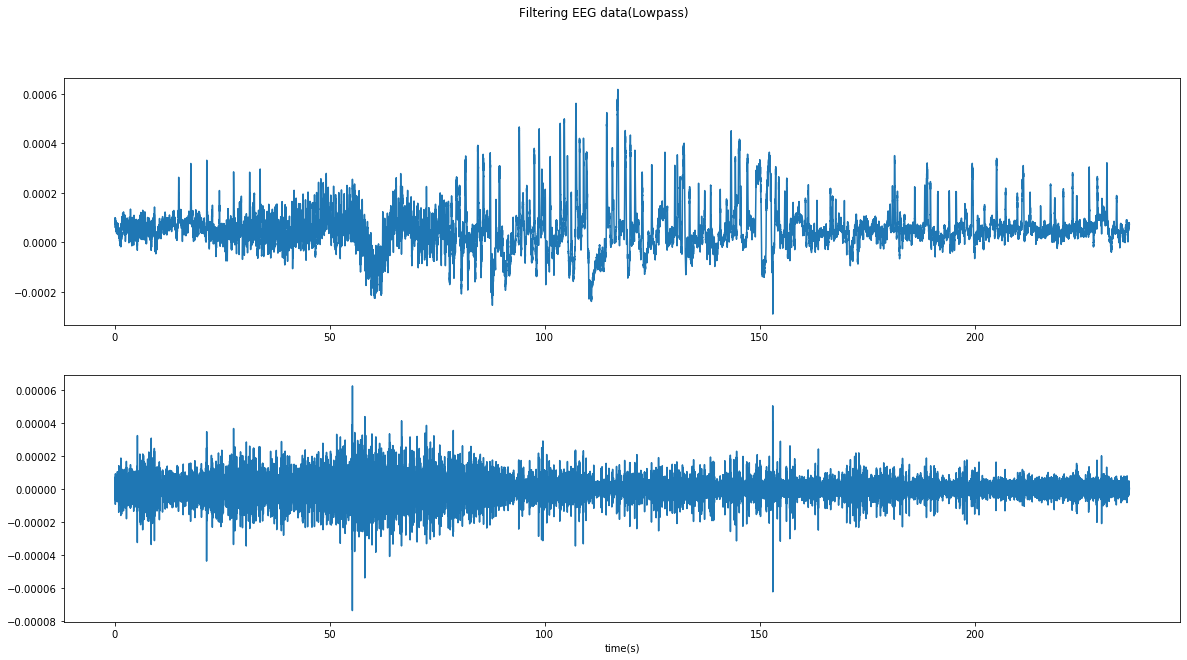

In [13]:
# Low pass filter
EEG_filt = mne.filter.filter_data(EEG_raw, sfreq, l_freq, h_freq, 
                                  picks=None, filter_length='auto', l_trans_bandwidth='auto', 
                                  h_trans_bandwidth='auto', n_jobs=1, method='fir', 
                                  iir_params=None, copy=True, phase='zero', fir_window='hamming', 
                                  fir_design='firwin', pad='reflect_limited', verbose=None)

# Take one channel, compare the filtered EEG with raw EEG
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Filtering EEG data(Lowpass)')
axs[0].plot(times, EEG_raw[0])
axs[1].plot(times, EEG_filt[0])
plt.xlabel('time(s)')

Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 67 samples (0.335 sec)



Text(0.5, 0, 'time(s)')

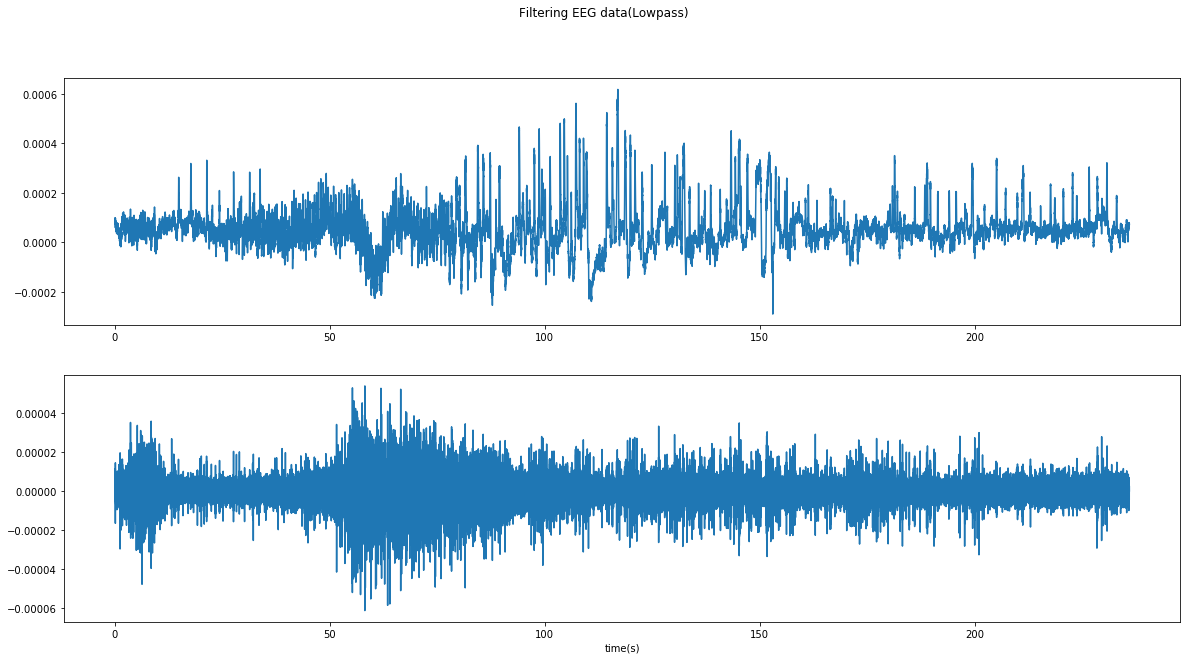

In [14]:
# High pass filter
l_freq, h_freq = 40, None
EEG_filt = mne.filter.filter_data(EEG_raw, sfreq, l_freq, h_freq, 
                                  picks=None, filter_length='auto', l_trans_bandwidth='auto', 
                                  h_trans_bandwidth='auto', n_jobs=1, method='fir', 
                                  iir_params=None, copy=True, phase='zero', fir_window='hamming', 
                                  fir_design='firwin', pad='reflect_limited', verbose=None)

# Take one channel, compare the filtered EEG with raw EEG
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Filtering EEG data(Lowpass)')
axs[0].plot(times, EEG_raw[0])
axs[1].plot(times, EEG_filt[0])
plt.xlabel('time(s)')

Setting up band-pass filter from 15 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 177 samples (0.885 sec)



Text(0.5, 0, 'time(s)')

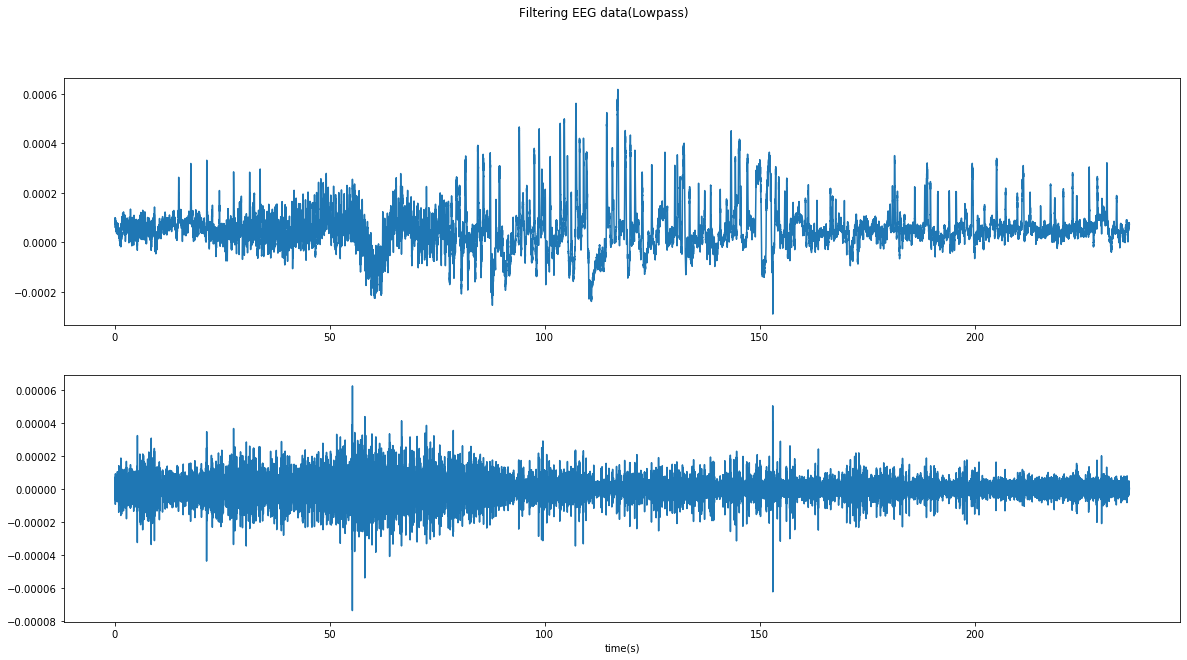

In [15]:
# Band pass filter
l_freq, h_freq = 15,30
EEG_filt = mne.filter.filter_data(EEG_raw, sfreq, l_freq, h_freq, 
                                  picks=None, filter_length='auto', l_trans_bandwidth='auto', 
                                  h_trans_bandwidth='auto', n_jobs=1, method='fir', 
                                  iir_params=None, copy=True, phase='zero', fir_window='hamming', 
                                  fir_design='firwin', pad='reflect_limited', verbose=None)

# Take one channel, compare the filtered EEG with raw EEG
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Filtering EEG data(Lowpass)')
axs[0].plot(times, EEG_raw[0])
axs[1].plot(times, EEG_filt[0])
plt.xlabel('time(s)')

Text(0, 0.5, 'Frequency(Hz)')

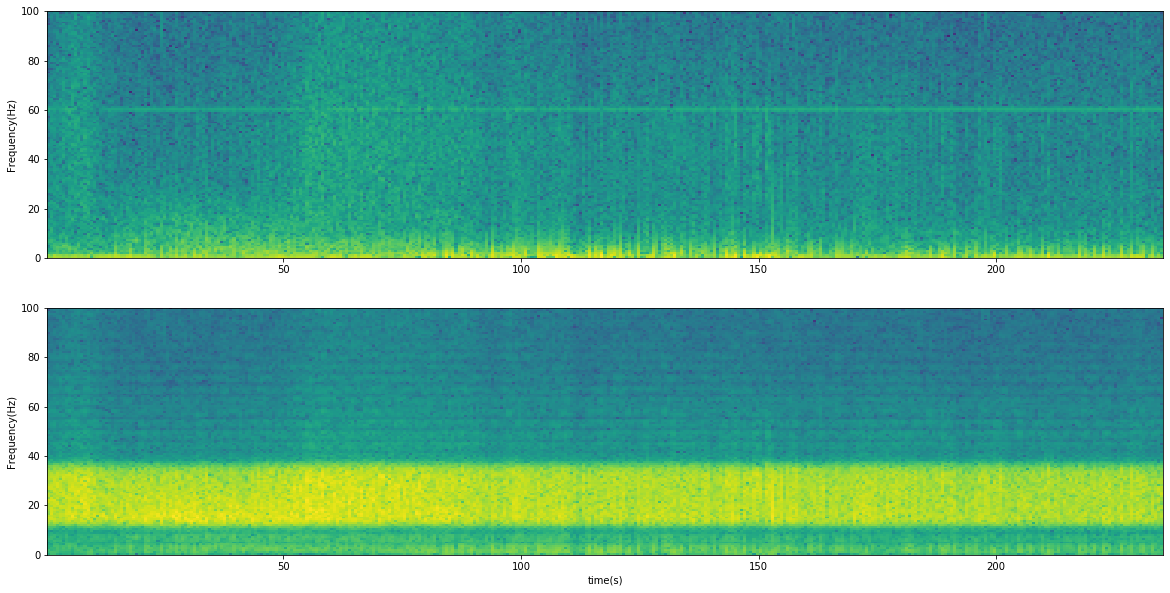

In [16]:
# Show Spectrum
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.specgram(EEG_raw[0],Fs=sfreq)
plt.ylabel('Frequency(Hz)')
plt.subplot(2,1,2)
plt.specgram(EEG_filt[0],Fs=sfreq)
plt.xlabel('time(s)')
plt.ylabel('Frequency(Hz)')